In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mental_health_data = pd.read_csv("./data/raw/")

FileNotFoundError: [Errno 2] No such file or directory: './data/raw/mental_health_social_media_dataset.csv'

In [4]:
mental_health_data.head()

,Timestamp,Content,Sentiment,Topics,Mental Health Indicator,Source Platform,Language
0,2023-04-17 03:10:43,Article since though book.\nRequire program te...,negative,loneliness,0,Instagram,English
1,2023-10-05 21:35:24,Blue likely contain far sport recent. Part int...,neutral,loneliness,0,Instagram,English
2,2024-03-04 06:35:35,Everyone blood cold strategy respond best. I s...,positive,depression,0,Instagram,English
3,2023-05-14 22:57:47,Maybe computer official professional follow an...,neutral,loneliness,1,Reddit,English
4,2024-02-09 02:11:55,Be kid over much old natural personal reason. ...,negative,loneliness,1,Facebook,English


## Describe dataset

In [8]:
mental_health_data.describe(include="all")

,Timestamp,Content,Sentiment,Topics,Mental Health Indicator,Source Platform,Language
count,10000,10000,10000,10000,10000.000000,10000,10000
unique,9999,10000,3,7,NaN,4,1
top,2023-11-20 03:29:33,Article since though book.\nRequire program te...,neutral,loneliness,NaN,Twitter,English
freq,2,1,3352,1471,NaN,2543,10000
mean,NaN,NaN,NaN,NaN,0.699800,NaN,NaN
std,NaN,NaN,NaN,NaN,0.458368,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


## Missing values

In [9]:
mental_health_data.isnull().sum()

Timestamp                  0
Content                    0
Sentiment                  0
Topics                     0
Mental Health Indicator    0
Source Platform            0
Language                   0
dtype: int64

## Sentiment Distribution

In [14]:
sentiment_counts = mental_health_data["Sentiment"].value_counts()

## Visualize sentiments

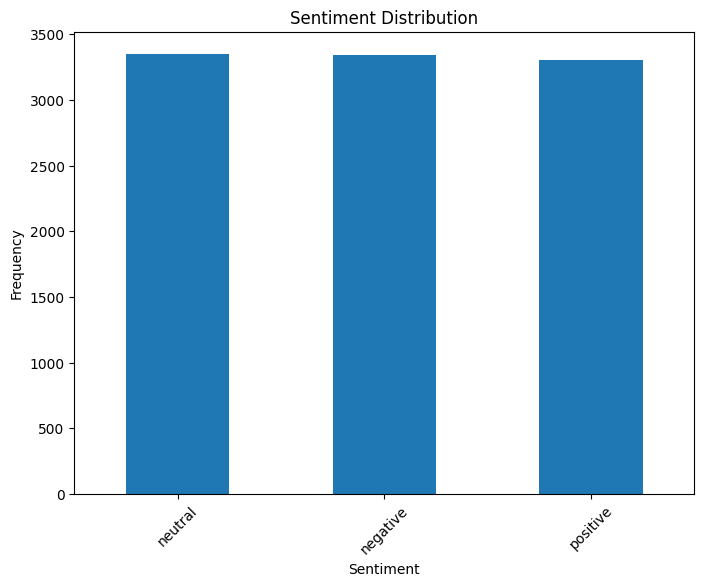

In [16]:
# Create a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Topic distribution

In [17]:
topic_counts = mental_health_data["Topics"].value_counts()

In [18]:
topic_counts

Topics
loneliness           1471
anxiety              1453
stress management    1430
wellness             1425
depression           1424
self-care            1399
therapy              1398
Name: count, dtype: int64

## Visualize topic distribution

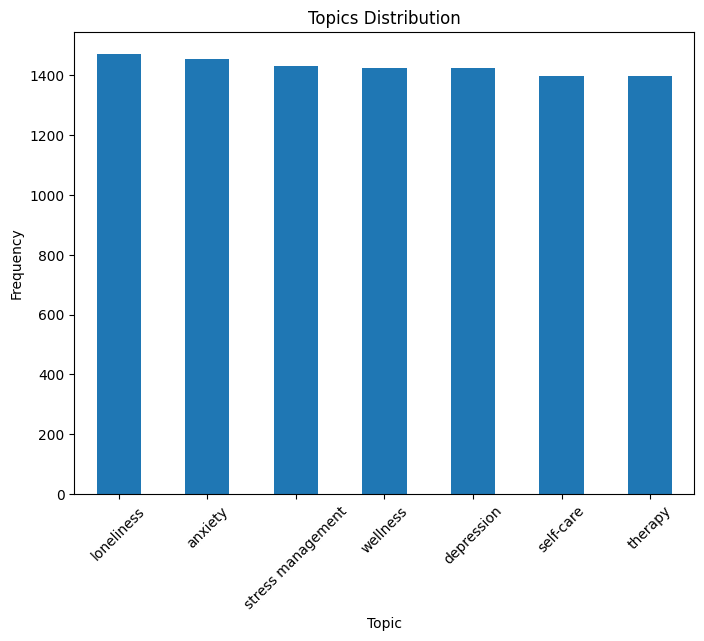

In [19]:
# Create a bar chart
plt.figure(figsize=(8, 6))
topic_counts.plot(kind='bar')
plt.title('Topics Distribution')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Clean dataset

In [20]:
# Cleaning Text Data: Removing special characters and converting to lowercase
mental_health_data['Cleaned_Content'] = mental_health_data['Content'].str.replace(r"[^\w\s]", '', regex=True).str.lower()

In [24]:
mental_health_data.drop(columns=["Content"], inplace=True)

In [25]:
mental_health_data.head()

,Timestamp,Sentiment,Topics,Mental Health Indicator,Source Platform,Language,Cleaned_Content
0,2023-04-17 03:10:43,negative,loneliness,0,Instagram,English,article since though book\nrequire program tea...
1,2023-10-05 21:35:24,neutral,loneliness,0,Instagram,English,blue likely contain far sport recent part inte...
2,2024-03-04 06:35:35,positive,depression,0,Instagram,English,everyone blood cold strategy respond best i se...
3,2023-05-14 22:57:47,neutral,loneliness,1,Reddit,English,maybe computer official professional follow an...
4,2024-02-09 02:11:55,negative,loneliness,1,Facebook,English,be kid over much old natural personal reason s...


In [27]:
mental_health_data.to_csv("./Data/Mental_health_cleaned_data.csv")